In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#print(data.columns)
data=pd.read_csv('/content/50_Startups.csv')
print(data.head())
print(data.shape)

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
(50, 5)


In [ ]:
y = np.asarray(data['Profit'].values.tolist()) 
data.drop(["Profit"], axis = 1, inplace = True)
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
#fixing the state collumn using one hut encoding -- from scratch
print(data.iloc[:,3].value_counts())
data.replace(to_replace=["California","New York","Flordia"], value=[1,2,3])
#3=flordia
#1=california
#2=new york

data["California"]=data.iloc[:,3]
data["New York"]=data.iloc[:,3]
data["Flordia"]=data.iloc[:,3]
data.head

New York      17
California    17
Florida       16
Name: State, dtype: int64


<bound method NDFrame.head of     R&D Spend  Administration  Marketing Spend       State  California  \
0   165349.20       136897.80        471784.10    New York    New York   
1   162597.70       151377.59        443898.53  California  California   
2   153441.51       101145.55        407934.54     Florida     Florida   
3   144372.41       118671.85        383199.62    New York    New York   
4   142107.34        91391.77        366168.42     Florida     Florida   
5   131876.90        99814.71        362861.36    New York    New York   
6   134615.46       147198.87        127716.82  California  California   
7   130298.13       145530.06        323876.68     Florida     Florida   
8   120542.52       148718.95        311613.29    New York    New York   
9   123334.88       108679.17        304981.62  California  California   
10  101913.08       110594.11        229160.95     Florida     Florida   
11  100671.96        91790.61        249744.55  California  California   
12   938

In [ ]:
data.loc[data["California"]!="California", "California"] = 0
data.loc[data["California"]=="California", "California"] = 1

In [ ]:
data.loc[data["Flordia"]!="Flordia", "Flordia"] = 0
data.loc[data["Flordia"]=="Flordia", "Flordia"] = 1

In [ ]:
data.loc[data["New York"]!="New York", "New York"] = 0
data.loc[data["New York"]=="New York", "New York"] = 1

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,California,New York,Flordia
0,165349.20,136897.80,471784.10,New York,0,1,0
1,162597.70,151377.59,443898.53,California,1,0,0
2,153441.51,101145.55,407934.54,Florida,0,0,0
3,144372.41,118671.85,383199.62,New York,0,1,0
4,142107.34,91391.77,366168.42,Florida,0,0,0


In [ ]:
data.drop(["State"], axis = 1, inplace = True)
data.head()

,R&D Spend,Administration,Marketing Spend,California,New York,Flordia
0,165349.20,136897.80,471784.10,0,1,0
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,0,0
3,144372.41,118671.85,383199.62,0,1,0
4,142107.34,91391.77,366168.42,0,0,0


In [ ]:
x = np.asarray(data.values.tolist())
print(x)
print(type(x))

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.0067196e+05 9.179

In [ ]:
#fixing the y dimensions
y=y.reshape(len(y),1)
y.shape
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
print('The shape of the independent features is ',x.shape)
print('The shape of the dependent features is ',y.shape)

The shape of the independent features is  (50, 6)
The shape of the dependent features is  (50, 1)


In [ ]:
#Feature Scaling for Independent Variables
for i in range(x.shape[1]-2):
  x[:,i] = (x[:,i] - int(np.mean(x[:,i])))/np.std(x[:,i])


In [ ]:
#add a 1 to the front of both features for X_0
col=np.ones(x.shape[0])
x= np.insert(x,0,col,axis=1)
x.shape
print(x.shape)

(50, 7)


In [ ]:
#splitting into a training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#hypothesis - theta*x array - theta should be row array(x rows,1) and length is the number of features
def h_x(theta,x):
  hx=np.dot(x,theta)
  return hx 

In [ ]:
#cost function - J(theta)
def cost_func(x,y,theta):
  m=y.shape[0]
  h=h_x(theta,x)
  j_theta=(1/(2*m))*np.sum(np.square(h-y))
  return j_theta

In [ ]:
#gradient descent -- how you update the theta -- going to the gloabal minimum

def grad_descent(x,y,theta,learningrate,iterations):
  Jtheta=[]
  m=y.size
  print(m)
  for i in range(iterations):
    hx= h_x(theta,x)
    dtheta=(1/m)*np.dot(x.T,hx-y)
    theta=theta-(learningrate*dtheta)
    Jtheta.append(cost_func(x,y,theta))
  return theta,Jtheta





In [ ]:


theta = np.zeros((x.shape[1], 1))
learningrate=0.001
iterations=20000


theta,Jtheta=grad_descent(x_train,y_train,theta,learningrate,iterations)


40


In [ ]:



theta

array([[109525.97052671],
       [ 34201.2855532 ],
       [  -121.13681384],
       [  4529.74509019],
       [  1106.58912813],
       [  4782.94869358],
       [     0.        ]])

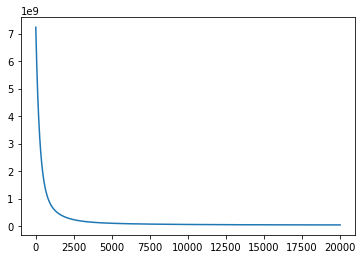

In [ ]:

rng=np.arange(0,iterations)
plt.plot(rng,Jtheta)
plt.show()

In [ ]:
#print(theta)
result=h_x(theta,x_test)
#error=(1/x_test.shape[0])*np.sum(np.abs(result-y_test))
error=((np.abs(result-y_test))/y_test)*100
print(np.average(error))
#print(error)

10.83427270678667


In [ ]:
result

array([[118385.26172987],
       [ 93407.60575062],
       [ 76599.43330324],
       [ 73326.47969311],
       [176983.9042905 ],
       [173938.90753289],
       [ 51638.55369123],
       [104175.22140909],
       [ 58275.00290955],
       [100105.0426358 ]])

In [ ]:
y_test

array([[105008.31],
       [ 96479.51],
       [ 78239.91],
       [ 81229.06],
       [191050.39],
       [182901.99],
       [ 35673.41],
       [101004.64],
       [ 49490.75],
       [ 97483.56]])

In [ ]:
# on average there is a 10% difference betwen the expected result and predicted